In [109]:
import pandas as pd
import numpy as np

<h6 style="background-color: #FE5F55;border-radius:15%; color:white;"><b><i>Aldıgım hacettepe movie review veri setinde <sub><a href="http://humirapps.cs.hacettepe.edu.tr/tsad.aspx">link </a></sub>sütun adları yoktu. Onları ekliyoruz</i></b></h6>


In [110]:
columns = "id;type;comment;sentiment;unknown;point"

with open("../raw_datas/HacettepeMovieReview.csv", encoding="utf-8", mode="r") as file:
    content = file.readlines()

if content[0].strip() != columns:
    content.insert(0, columns + "\n")

with open("../raw_datas/HacettepeMovieReview.csv", encoding="utf-8", mode="w") as file:
    file.writelines(content)

In [111]:
hacettepe_df = pd.read_csv(
    "../raw_datas/HacettepeMovieReview.csv", delimiter=";")

In [112]:
hacettepe_df.columns

Index(['id', 'type', 'comment', 'sentiment', 'unknown', 'point'], dtype='object')

In [113]:
hacettepe_df["type"].unique()

array(['Hotel Review', 'Movie Review'], dtype=object)

<h6 style="background-color: #FE5F55;border-radius:15%; color:white;"><b><i>BURADA HOTEL REVİEW ' LERE İHTİYACIMIZ YOK . ÇIKARIYORUZ .</i></b></h6>


In [114]:
hacettepe_df = hacettepe_df[hacettepe_df["type"] != "Hotel Review"]

In [115]:
hacettepe_df["type"]

5800     Movie Review
5801     Movie Review
5802     Movie Review
5803     Movie Review
5804     Movie Review
             ...     
64995    Movie Review
64996    Movie Review
64997    Movie Review
64998    Movie Review
64999    Movie Review
Name: type, Length: 53400, dtype: object

In [116]:
print(hacettepe_df["point"].unique())
hacettepe_df.drop("point", axis=1, inplace=True)
hacettepe_df.drop("unknown", axis=1, inplace=True)
hacettepe_df.drop("id", axis=1, inplace=True)
hacettepe_df.drop("type", axis=1, inplace=True)

[1 2 3 4 5]


In [117]:
hacettepe_df.reset_index(drop=True, inplace=True)
hacettepe_df

,comment,sentiment
0,brad bitt fılmde cesur savascı rolunu yapamam...,Negative
1,Her şeyden önce film üzerine yorumumu iki böl...,Negative
2,süpper bir film gidin izleyinn süperrr,Negative
3,şaka gibi bir filmdi.2 buçuk saat boyunca uyu...,Negative
4,Film güzeldi ancak herkesin dikkatinden kaçan...,Negative
...,...,...
53395,Homeros’un iki ölümsüz eserini İlyada ve Odis...,Positive
53396,şu filmi 150 kere izledim .. 150 side keyifli...,Positive
53397,tek kelime ile mükemmel...,Positive
53398,izlediğim en güzel savaş filmlerinden birisi ...,Positive


In [118]:
hacettepe_df.head(10)

,comment,sentiment
0,brad bitt fılmde cesur savascı rolunu yapamam...,Negative
1,Her şeyden önce film üzerine yorumumu iki böl...,Negative
2,süpper bir film gidin izleyinn süperrr,Negative
3,şaka gibi bir filmdi.2 buçuk saat boyunca uyu...,Negative
4,Film güzeldi ancak herkesin dikkatinden kaçan...,Negative
5,"Oldukça kötü hem de her şey oyunculuklar , se...",Negative
6,Arkadaşlar filmi az önce izledim. Truva hakkı...,Negative
7,"pek beğenmedim.norton,giamatti’nin altında ez...",Negative
8,bekledigimin cok cok altında bi film oldu.fil...,Negative
9,Büyük hayal kırıklığına uğradım.Son daha başt...,Negative


In [122]:
# Daha sonra kullanabilmek adına işlenmiş verimizi kaydedelim
hacettepe_df.to_csv("../processed_datas/Processed_Hacettepe_Movie_Review.csv")

<h4><b><i>Temelde web-scraping veya diğer metotlar ile alınan bir veri seti icin yapılacak islemler su sekildedir: </i></b></h4>
<ul>
<li> 
<b>Cleaning Text :</b>
İstemediğimiz content oldugunda html etiketleri gibi özellik çıkarımından önce bunlara el atmamız gerek. Bir önceki ipynb dosyalarında strip_html_tags() fonksiyonundaki gibi.  
</li> 
<li>
<b>Removing accented characters:</b>
Türkçe yorumlarla ugrastıgımız icin ilgili kelime ve harflerin ASCII karakter standartlarına donusturulmesi aşamasıdır
 </li> 
<li>
<b>Expanding contractions:</b>
Bu aşama genelde ingilizce ve diğer diller icin geçerlidir. Kelimelerin kısaltılmış ve " ' " ile ayrılmış versiyonları gibidir . (Don't , won't) gibi.

 </li> 
<li>
 <b>Removing special characters:</b>
 özel karakterleri çıkartma işlemi
 </li> 
<li>
 <b>Stemming and lemmatization:</b>
 Kelimenin kökünü bulma ve ilgili yerdeki görevini çıkartma
 </li> 
<li>
<b>Removing stopwords:</b>
Stopwords, metin analizinde önemsiz veya az önemli olan kelimelerdir. Bu kelimeler genellikle sıkça kullanılır ve metnin anlamını belirleyen önemli kelimeler değildir. NLTK, İngilizce ve diğer diller için önceden tanımlanmış stopwords listeleri sağlar.
 </li> 
</ul>


In [95]:
df_X_array = pd.DataFrame(X.toarray())
df_X_array
# ASLINDA YAPILAN TAM OLARAK BU . ÇIKARILAN 6 ADET KELIMENIN TF VE IDF SKORLARINI CARPIMI VE AGIRLIGI
# MAX_FEATURES İSE KAC TANE KELIME ICIN AGIRLIK HESAPLANACAGIDIR.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.0,0.444002,0.550329,0.000000,0.550329,0.000000,0.444002,0.000000,0.00000,0.00000,0.000000,0.00000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.57735
2,0.523358,0.0,0.422242,0.000000,0.523358,0.000000,0.523358,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.495524,0.614189,0.00000,0.00000,0.614189,0.00000
4,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000


In [96]:
# KNN ILE DENEME YAPALIM
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=30)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
print("accuracy ==>", accuracy_score(y_test, y_pred))

accuracy ==> 1.0


In [100]:
comment1 = ["berbat bir filmdi"]
vec = tfidf_vectorizer_tutorial.transform(comment1)
preds = model.predict(vec)
print(preds)

['Negative']


<h5><b><em>SIMDI GERCEK VERI SETIMIZLE DENEME YAPALIM (TF-IFD)</em></b></h5>

<img src = "../imgs/tf-ifd.png"> </img>

BAG-OF-WORDS ' DE HER KELİMEYİ GORULME SIKLIGIYLA OLCERKEN , TF-IFD ' DE ISE O KELIMENIN ONEMINE GORE AGIRLIKLANDIRIYORUZ . YANI SADECE NE KADAR SIK KARSILASILDIGI DEGIL O KARSILASMALAR SONUCUNDA HANGI SIKLIKLA NEGATIF VEYA POZITIF OLDUGUNUN DA BIR AGIRLIGI VAR (ONEM DERECESI)


1. TF : Bir belgedeki bir kelimenin sıklığı : <math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>TF</mtext><mo stretchy="false">(</mo><mi>t</mi><mo separator="true">,</mo><mi>d</mi><mo stretchy="false">)</mo><mo>=</mo><mfrac><mrow><mtext>terim&nbsp;</mtext><mi>t</mi><mrow><mtext>’nin&nbsp;belgede&nbsp;g</mtext><mover accent="true"><mtext>o</mtext><mo>¨</mo></mover><mtext>r</mtext><mover accent="true"><mtext>u</mtext><mo>¨</mo></mover><mtext>lme&nbsp;sayısı</mtext></mrow></mrow><mtext>belgedeki&nbsp;toplam&nbsp;kelime&nbsp;sayısı</mtext></mfrac></mrow><annotation encoding="application/x-tex">\text{TF}(t, d) = \frac{\text{terim } t \text{'nin belgede görülme sayısı}}{\text{belgedeki toplam kelime sayısı}}
   </annotation></semantics></math>
   <br>
2. IDF : Bir terimin belge koleksiyonu içindeki yaygınlığı : <br>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>IDF</mtext><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo><mo>=</mo><mi>log</mi><mo>⁡</mo><mrow><mo fence="true">(</mo><mfrac><mtext>belge&nbsp;koleksiyonundaki&nbsp;toplam&nbsp;belge&nbsp;sayısı</mtext><mrow><mtext>terimi&nbsp;i</mtext><mover accent="true"><mtext>c</mtext><mo>¸</mo></mover><mtext>eren&nbsp;belge&nbsp;sayısı</mtext></mrow></mfrac><mo fence="true">)</mo></mrow></mrow><annotation encoding="application/x-tex">\text{IDF}(t) = \log\left(\frac{\text{belge koleksiyonundaki toplam belge sayısı}}{\text{terimi içeren belge sayısı}}\right)
</annotation></semantics></math>
TF-IFD SKORU HESAPLANMASI : <br>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mtext>TF-IDF</mtext><mo stretchy="false">(</mo><mi>t</mi><mo separator="true">,</mo><mi>d</mi><mo stretchy="false">)</mo><mo>=</mo><mtext>TF</mtext><mo stretchy="false">(</mo><mi>t</mi><mo separator="true">,</mo><mi>d</mi><mo stretchy="false">)</mo><mo>×</mo><mtext>IDF</mtext><mo stretchy="false">(</mo><mi>t</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
</annotation></semantics></math>


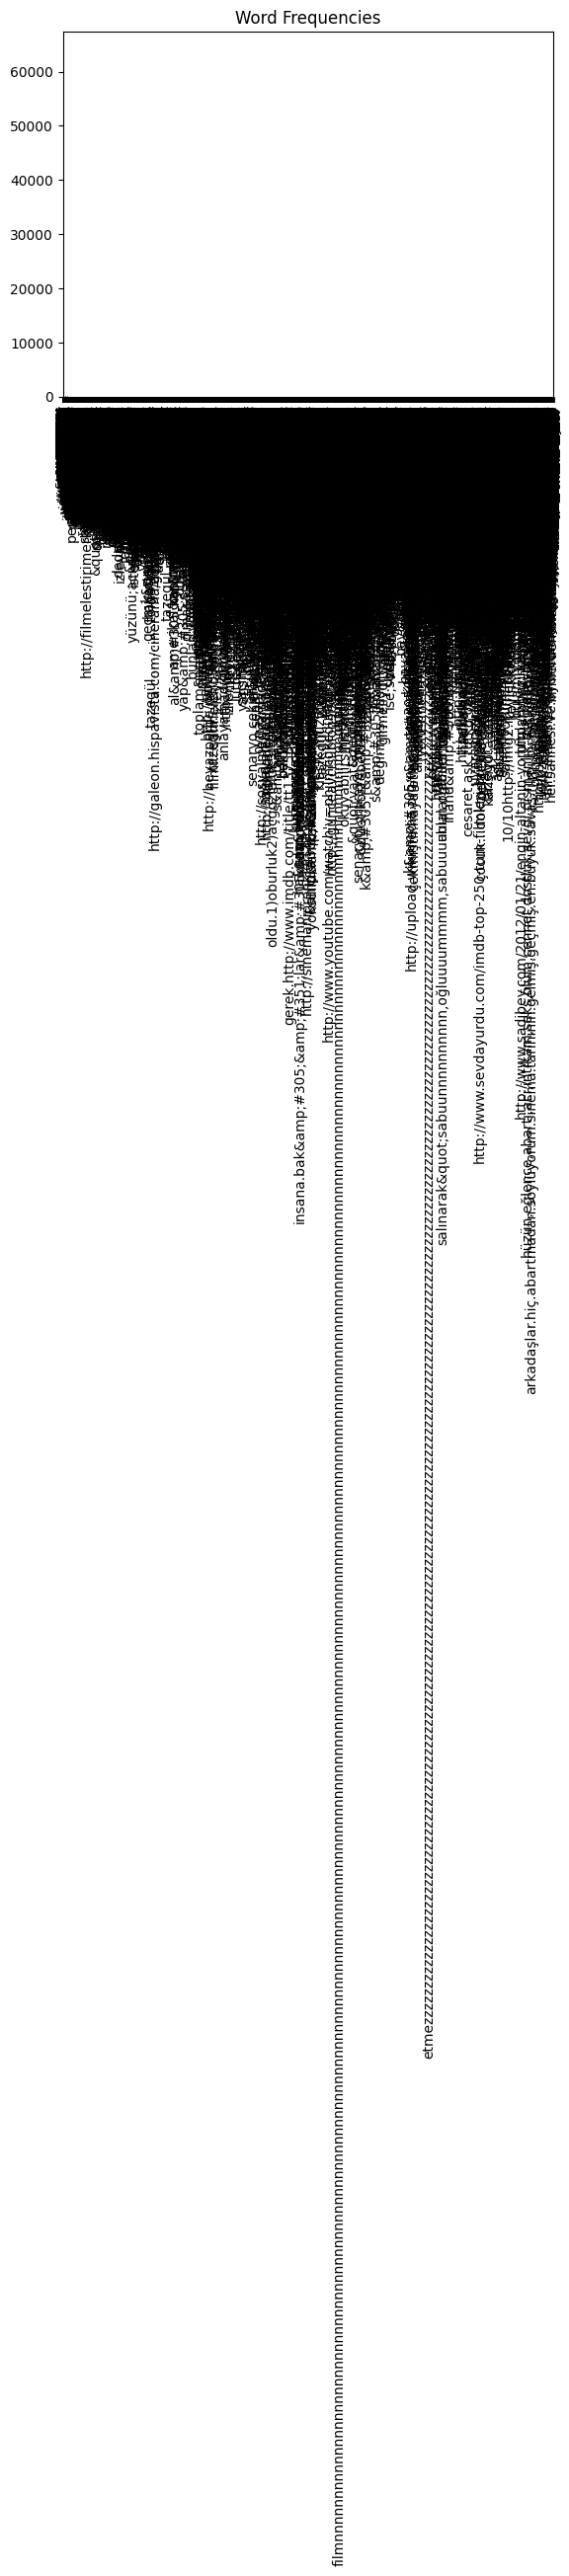

In [12]:

df = hacettepe_df
# FEATURE EXTRACTION
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['comment'])
y = df['sentiment']

negative_count = df[df['sentiment'] == 'negative'].shape[0]
positive_count = df[df['sentiment'] == 'positive'].shape[0]


count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['comment'])

df['comment'] = df['comment'].str.lower()


word_freq = df['comment'].str.split(expand=True).stack().value_counts()
word_freq.plot(kind='bar', title='Word Frequencies')
plt.show()

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Step 9: Model Evaluation
y_pred = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.899625468164794
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.90      0.90      5373
    Positive       0.90      0.90      0.90      5307

    accuracy                           0.90     10680
   macro avg       0.90      0.90      0.90     10680
weighted avg       0.90      0.90      0.90     10680



EĞİTİM 3.5 SAAT SÜRDÜĞÜ İCİN MODELİ KAYDETMEKTE YARAR VAR


In [101]:
import joblib
joblib.dump(logistic_model, 'logistic_model.joblib')
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [102]:
import joblib
tfidf_vectorizer2 = joblib.load("tfidf_vectorizer.joblib")
logistic_model = joblib.load("logistic_model.joblib")

In [103]:
len(tfidf_vectorizer2.get_feature_names_out())

8

YENİ VERİLERLE TAHMİN YAPALIM


In [34]:
comments1 = [
    "SENARYOSU COK ZAYIF KALMIS BELIRLI BIR SURE SONRA FILMDEN SIKILMAYA BASLADIM FAKAT OYUNCULUKLAR GUZELDİ ."]
comments1_features = tfidf_vectorizer2.transform(comments1)
predictions = logistic_model.predict(comments1_features)
print("deneme 1 ==>")
print("tahminler", predictions)

ALICAN DENEME ==>
tahminler ['Positive']


In [5]:
comments2 = ["oyunculuklar göz alıcı"]
comments2_features = tfidf_vectorizer2.transform(comments2)
predictions = logistic_model.predict(comments2_features)
print("deneme 2 ==>")
print("tahminler", predictions)

cenap denemeleri ==>
tahminler ['Positive']


In [17]:
comments3 = [
    "başka filmler gibi gereksiz şeyler anlatmıyor.Anlatılanlar ve oyunculuk süperdi"]

comments3_features = tfidf_vectorizer.transform(comments3)

predictions = logistic_model.predict(comments3_features)

print("deneme 3 ==>")

print("tahminler", predictions)

cenap denemeleri ==>
tahminler ['Negative']
